<a href="https://colab.research.google.com/github/fportoDexl/cursoBigData/blob/main/src/CriandRDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://drive.google.com/uc?id=1Oj5GoldtG5ZWgGOyRLGkhthLR2nc6Lcj'>

#Exemplo 1- Aula 2

In [1]:
pip install pyspark

     |████████████████████████████████| 281.4 MB 33 kB/s 
     |████████████████████████████████| 198 kB 60.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=4a5226e439681aee8b9cb1c3b538d7fa2436803a71755c2eec2f7d864504904c
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [2]:
import pyspark
import random
from google.colab import drive

In [13]:
#Rodar apenas para as celulas usado dataframe
from pyspark.sql import SparkSession

In [3]:
from pyspark.context import SparkContext
sc= SparkContext(appName="parallelize", master="local[4]")

In [4]:
particionadoRDD = sc.parallelize([1,4,6,45,98],2)

In [5]:
particionadoRDD.count()

5

In [6]:
particionado_randRDD = sc.parallelize(random.sample(range(1,5000),1000),2)
particionado_randRDD.count()

1000

In [7]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Lê o arquivo e  cria um RDD com uma partição para cada bloco de 128MB, por default

In [8]:
taxi_file_header = sc.textFile("/content/gdrive/MyDrive/BigData/data/yellow_tripdata_2021-01.csv")
taxi_file_header.take(10)

['VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge',
 '1,2021-01-01 00:30:10,2021-01-01 00:36:12,1,2.10,1,N,142,43,2,8,3,0.5,0,0,0.3,11.8,2.5',
 '1,2021-01-01 00:51:20,2021-01-01 00:52:19,1,.20,1,N,238,151,2,3,0.5,0.5,0,0,0.3,4.3,0',
 '1,2021-01-01 00:43:30,2021-01-01 01:11:06,1,14.70,1,N,132,165,1,42,0.5,0.5,8.65,0,0.3,51.95,0',
 '1,2021-01-01 00:15:48,2021-01-01 00:31:01,0,10.60,1,N,138,132,1,29,0.5,0.5,6.05,0,0.3,36.35,0',
 '2,2021-01-01 00:31:49,2021-01-01 00:48:21,1,4.94,1,N,68,33,1,16.5,0.5,0.5,4.06,0,0.3,24.36,2.5',
 '1,2021-01-01 00:16:29,2021-01-01 00:24:30,1,1.60,1,N,224,68,1,8,3,0.5,2.35,0,0.3,14.15,2.5',
 '1,2021-01-01 00:00:28,2021-01-01 00:17:28,1,4.10,1,N,95,157,2,16,0.5,0.5,0,0,0.3,17.3,0',
 '1,2021-01-01 00:12:29,2021-01-01 00:30:34,1,5.70,1,N,90,40,2,18,3,0.5,0,0,

In [9]:
taxi_file_header.count()

1369766

# Gerando uma saida em parquet
## Parquet é um formato colunar. Usamos Spark SQL para gravar e ler arquivos neste formato. Parquet  apresenta otimizações de  I/O, como compressão.
## Spark SQL é a máquina de execuçao de dados estruturados em Spark. Além de parquet, pode se comunicar com: JSON, Hive, Avro, ORC, CSV. Pode também suar JDBC/ODBC para se comuicar com fontes de dados externas como sistemas de bancos de dados Relacionais: POstgres, MySQL etc...
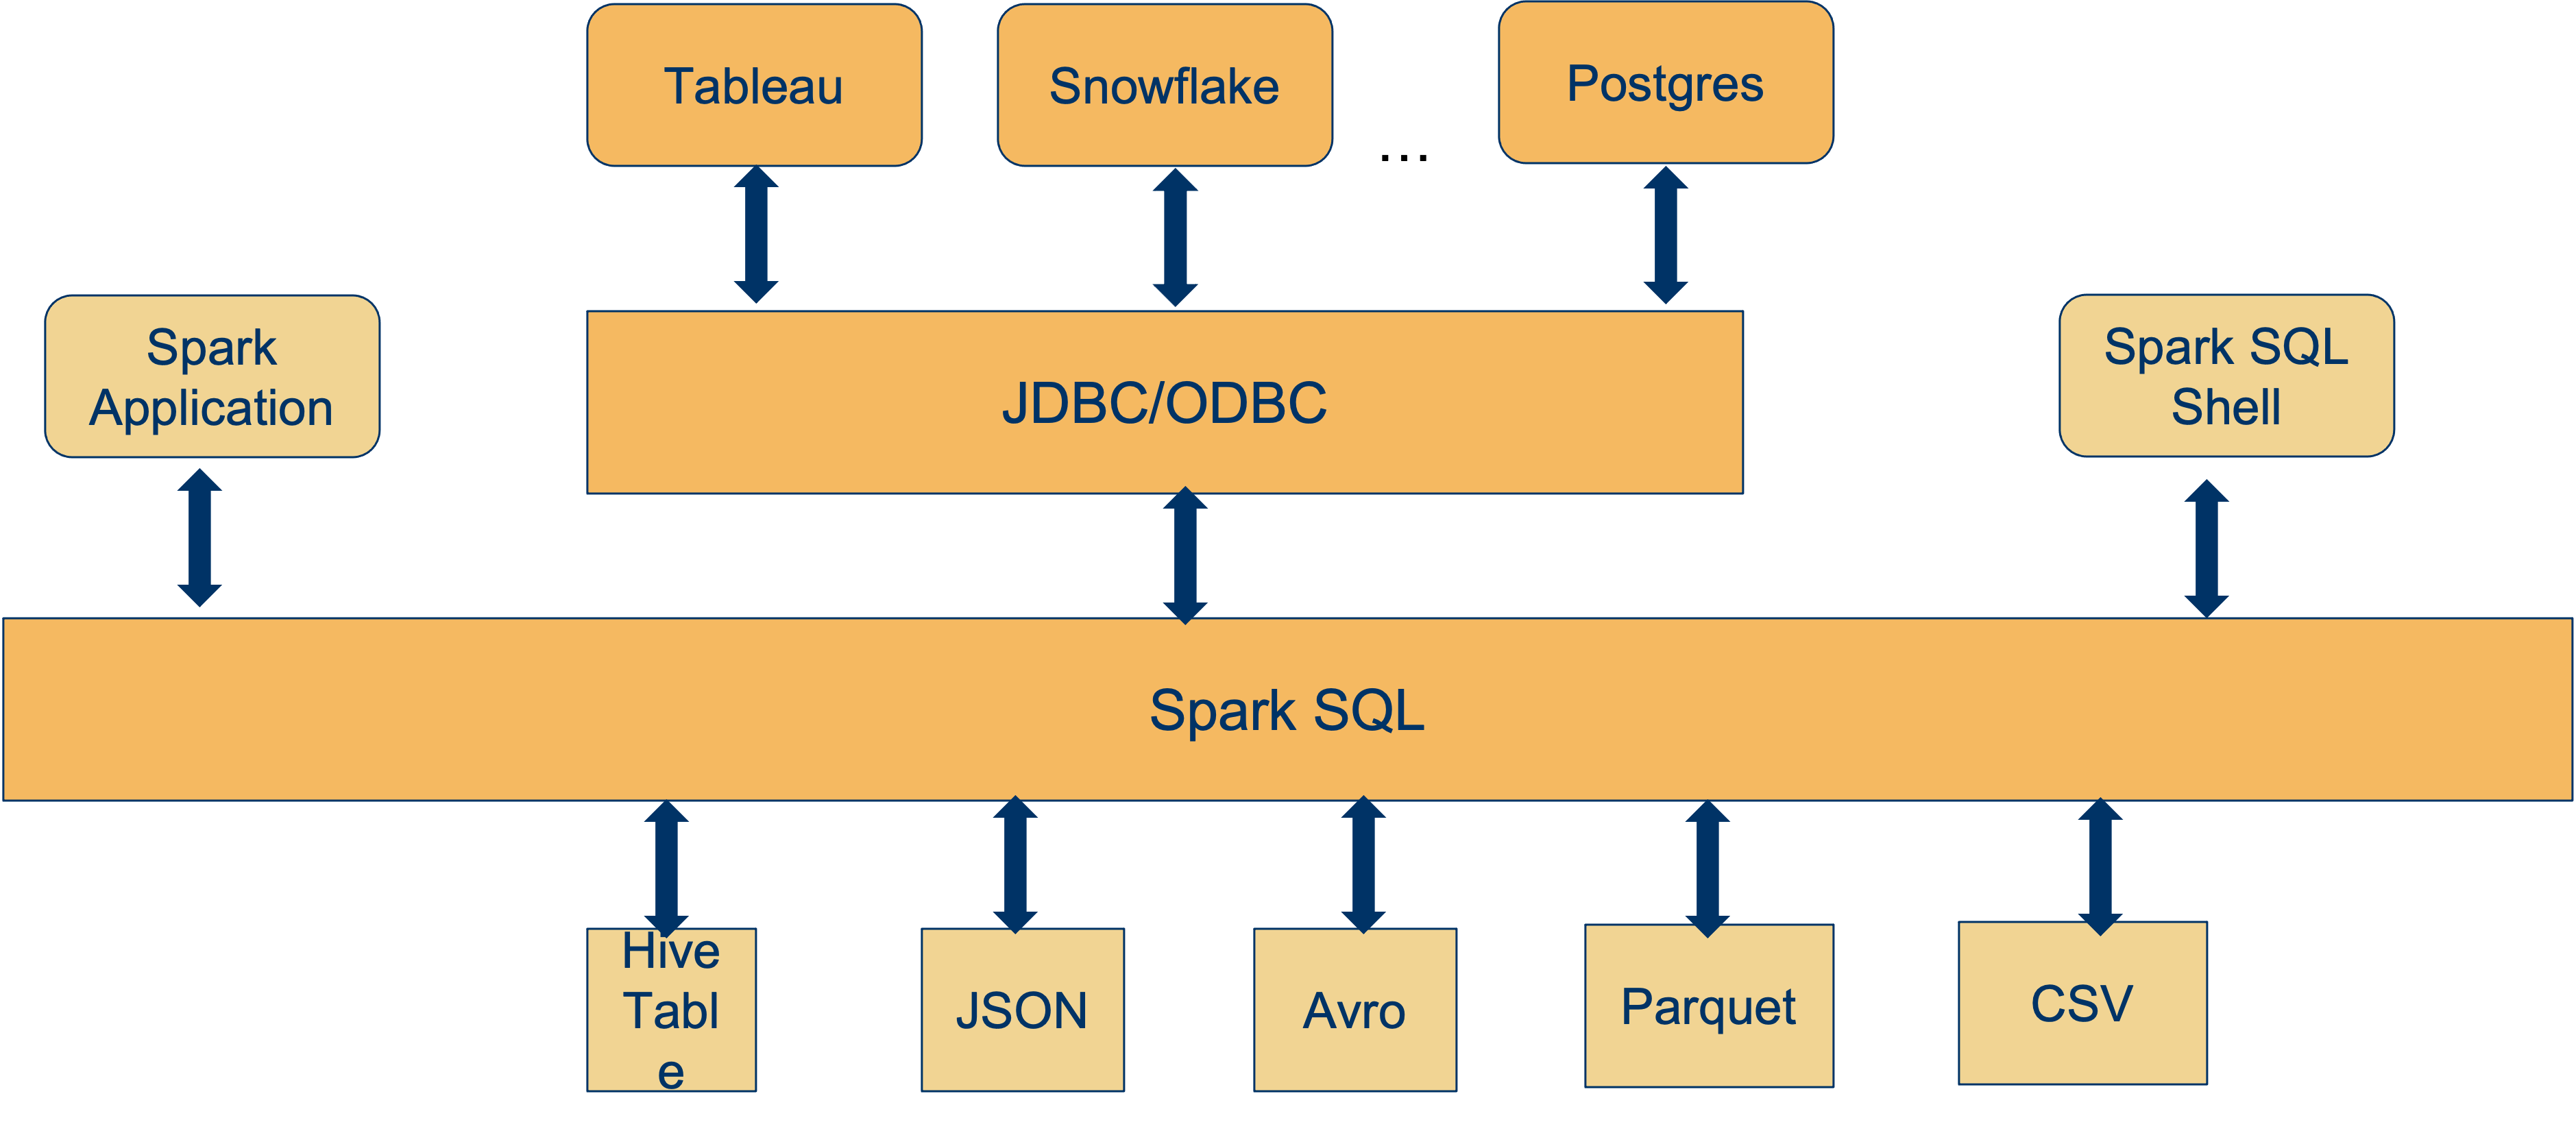

In [10]:
from pyspark.sql import Row

# Lê um arquivo no formato JSON a partir do Google Drive

In [11]:
!wget https://raw.githubusercontent.com/apache/spark/master/examples/src/main/resources/people.json

--2022-04-14 13:45:54--  https://raw.githubusercontent.com/apache/spark/master/examples/src/main/resources/people.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73 [text/plain]
Saving to: ‘people.json’

people.json         100%[===================>]      73  --.-KB/s    in 0s      

2022-04-14 13:45:55 (2.72 MB/s) - ‘people.json’ saved [73/73]



In [14]:
spark = (SparkSession.builder
        .appName("FromJSONtoParquet")
        .getOrCreate())

In [15]:
peopledf = spark.read.json("people.json")
peopledf.printSchema()

root
 |-- age: long (nullable = true)
 |-- name: string (nullable = true)



In [16]:
peopledf.count()

3

In [18]:
peopledf.show()

+----+-------+
| age|   name|
+----+-------+
|null|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



# Exemplo 3 - Aula 2 - Criando Dataframe com schema
### Não esqueça de criar a conexão com a Spark Session

# Grava a saida do processo no formato Parquet
 ## Como peopledf guarda o esquema inferido a partir do JSON, precisamos converter
 ## Definimos um novo esquema; geramos um novo dataframe com o novo esquema
 ## Gravamos em parquet com o esquema desejado (compatível)

In [22]:
from pyspark.sql import SQLContext
from pyspark.sql.types import StructType, StructField, IntegerType,StringType
schema_pessoa=StructType([StructField("idade",IntegerType(),True),StructField("nome",StringType(),False)])
sqlContext=SQLContext(spark)
peopledfCast = sqlContext.createDataFrame(peopledf.collect(),schema_pessoa)
peopledfCast.printSchema() 


/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


root
 |-- idade: integer (nullable = true)
 |-- nome: string (nullable = false)



In [23]:

peopledfCast.write.mode("overwrite").option("schema", schema_pessoa).parquet("people.parquet")
peopleParquetdf=spark.read.parquet("people.parquet")
peopleParquetdf.show()

+-----+-------+
|idade|   nome|
+-----+-------+
|   19| Justin|
|   30|   Andy|
| null|Michael|
+-----+-------+



In [24]:
peopleParquetdf.printSchema()

root
 |-- idade: integer (nullable = true)
 |-- nome: string (nullable = true)



In [39]:
from pyspark.sql.types import *
#Define o esquema do dataframe. 
# A definição do esquema evita que o Spark lance um job para ler parte dos dados e inferir o esquema

schema_pessoa=StructType([StructField("idade",IntegerType(),True),StructField("nome",StringType(),False)])
path="people.parquet"                      
pessoadf = spark.read.schema(schema_pessoa).parquet(path)

In [40]:
pessoadf.printSchema()
pessoadf.show()
pessoadf.count()

root
 |-- idade: integer (nullable = true)
 |-- nome: string (nullable = true)

+-----+----+
|idade|nome|
+-----+----+
| null|null|
| null|null|
| null|null|
+-----+----+



3

In [ ]:
# Transformando df para RDD
pessoaRDD =pessoadf.rdd

In [ ]:
pessoaRDD.take(1)

[Row(idade=None, nome=None)]